<a href="https://colab.research.google.com/github/denverkim/LIG/blob/main/%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EA%B3%A0%EC%96%91%EC%9D%B4%EC%99%80_%EA%B0%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 훈련된 모델 사용하는 방법



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

In [ ]:
base_model = VGG16(weights='imagenet',
              input_shape=(240,240,3), include_top=False)
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                              

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 31.4 MB/s 


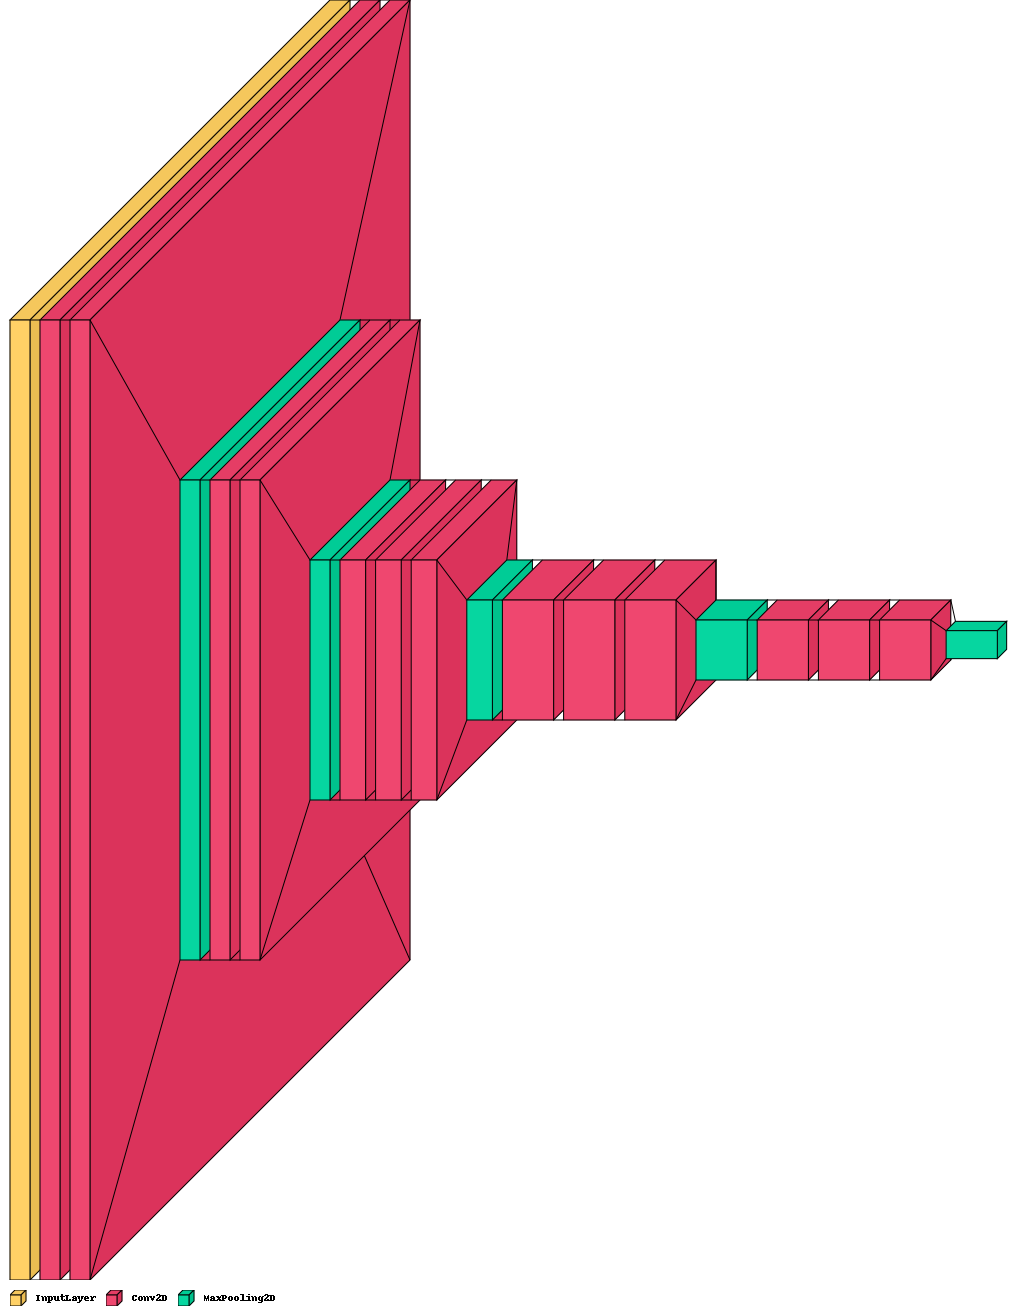

In [ ]:
# !pip install visualkeras
import visualkeras
visualkeras.layered_view(base_model, legend=True) 

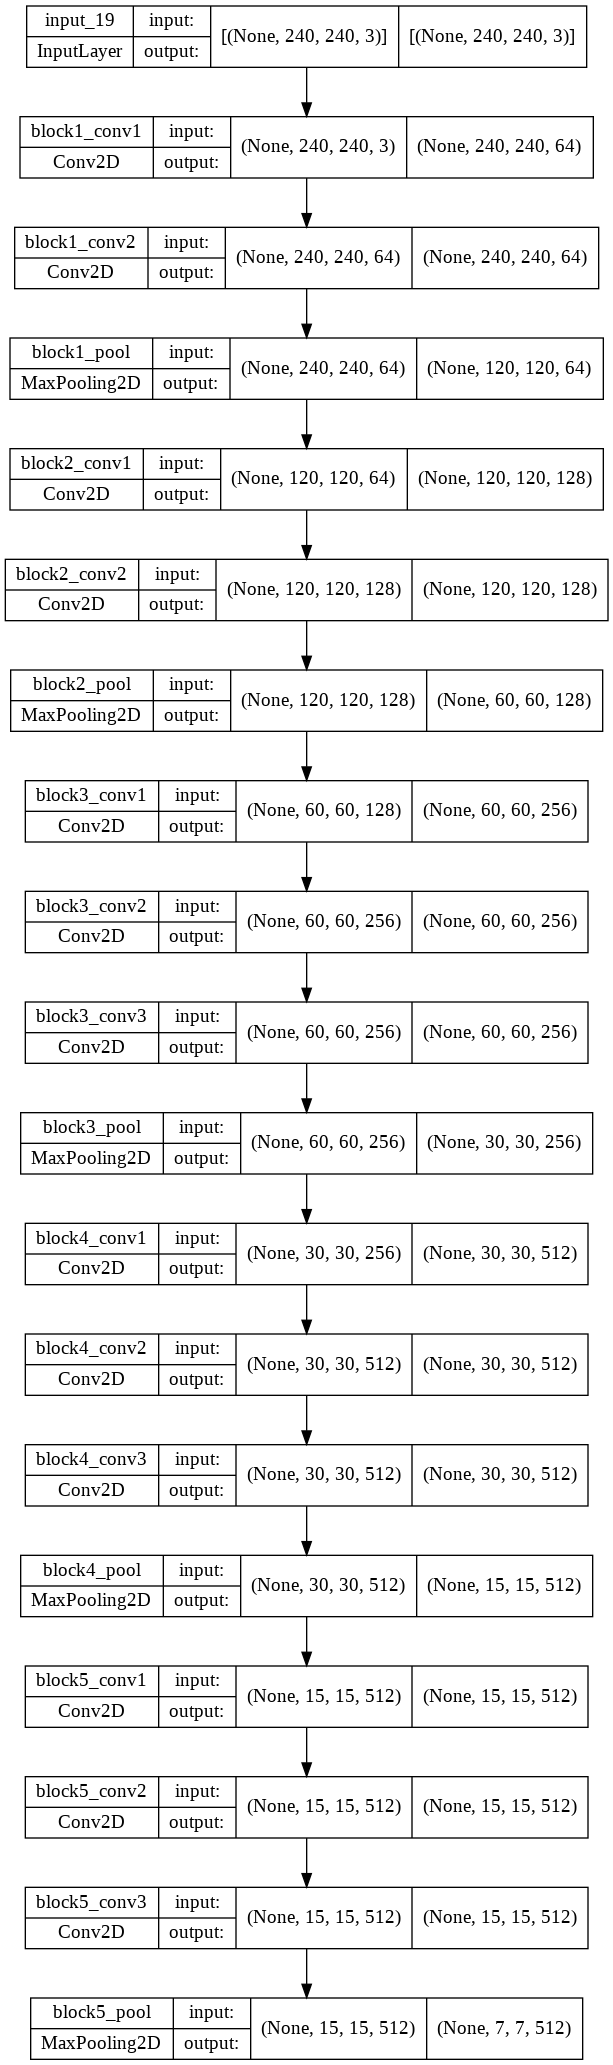

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(base_model, 'model.png', show_shapes=True)

In [ ]:
base_model.input
base_model.output
base_model.layers[-1]
base_model.layers.pop()

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,320,644
Trainable params: 16,320,644
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mobilenet = MobileNet(weights=None, input_shape=None, include_top=True)
efficientnet = EfficientNetB0(weights=None, input_shape=None, include_top=True)
resnet50 = ResNet50(weights=None, input_shape=None, include_top=True)
xception = Xception(weights=None, input_shape=None, include_top=True)

In [ ]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
efficientnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_21[0][0]']               
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

# Dog vs Cats Example

In [ ]:
# modules import
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
# 데이터 로드
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
/content/cats_and_dogs_filtered.zip

--2022-07-24 15:55:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M  49.4MB/s    in 1.3s    

2022-07-24 15:55:14 (49.4 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# 압축풀기
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# 패쓰설정
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# 데이터 어그멘테이션
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(
    rescale = 1.0/255.)

train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='binary'
)
test = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# CNN Model

In [ ]:
# 모델생성
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = 'cat_and_dogs_model.h5'
checkpoint = ModelCheckpoint(save_file_name, monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='auto')
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(train, epochs=30, validation_data=test,verbose=2, callbacks=[checkpoint, earlystopping]) #steps_per_epoch=100, batch_size=256,  validation_steps=50, 

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.69064, saving model to cat_and_dogs_model.h5
63/63 - 31s - loss: 0.6944 - accuracy: 0.5070 - val_loss: 0.6906 - val_accuracy: 0.5200 - 31s/epoch - 490ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.69064 to 0.68471, saving model to cat_and_dogs_model.h5
63/63 - 20s - loss: 0.6902 - accuracy: 0.5330 - val_loss: 0.6847 - val_accuracy: 0.5070 - 20s/epoch - 316ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.68471 to 0.67669, saving model to cat_and_dogs_model.h5
63/63 - 17s - loss: 0.6889 - accuracy: 0.5310 - val_loss: 0.6767 - val_accuracy: 0.5850 - 17s/epoch - 276ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.67669 to 0.64941, saving model to cat_and_dogs_model.h5
63/63 - 17s - loss: 0.6788 - accuracy: 0.5760 - val_loss: 0.6494 - val_accuracy: 0.6220 - 17s/epoch - 276ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 0.64941
63/63 - 17s - loss: 0.6632 - accuracy: 0.5935 - val_loss: 0.6571 - val_accuracy: 0.58

NameError: ignored

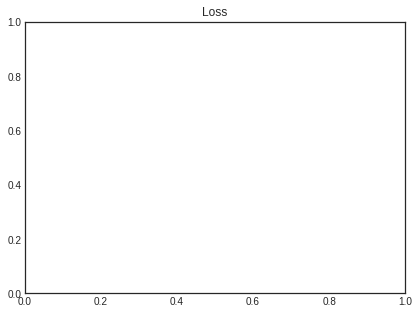

In [ ]:
# 히스토리 그래프
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Pretrained Model

In [ ]:
from tensorflow.keras.applications import *

# 사전 훈련된 모델 사용
base_model = VGG16(weights='imagenet',
              input_shape=(150,150,3), include_top=False)

In [ ]:
# 모델 생성
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련하기전 vgg16의 가중치가 바뀌는 것을 막기위해 이를 동결
len(model.trainable_weights)

30

In [ ]:
base_model.trainable=False
len(model.trainable_weights)

30

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = 'cat_and_dogs_model_with_pretrained_model.h5'
checkpoint = ModelCheckpoint(save_file_name, monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='auto')
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history2 = model.fit(train, epochs=30, validation_data=test, verbose=2, callbacks=[checkpoint, earlystopping]) #steps_per_epoch=100, batch_size=256,  validation_steps=50, 

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.34491, saving model to cat_and_dogs_model_with_pretrained_model.h5
63/63 - 34s - loss: 0.5320 - acc: 0.7185 - val_loss: 0.3449 - val_acc: 0.8560 - 34s/epoch - 538ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.34491 to 0.30782, saving model to cat_and_dogs_model_with_pretrained_model.h5
63/63 - 20s - loss: 0.3977 - acc: 0.8120 - val_loss: 0.3078 - val_acc: 0.8760 - 20s/epoch - 314ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.30782 to 0.27575, saving model to cat_and_dogs_model_with_pretrained_model.h5
63/63 - 19s - loss: 0.3527 - acc: 0.8485 - val_loss: 0.2757 - val_acc: 0.8910 - 19s/epoch - 308ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.27575 to 0.26428, saving model to cat_and_dogs_model_with_pretrained_model.h5
63/63 - 20s - loss: 0.3399 - acc: 0.8530 - val_loss: 0.2643 - val_acc: 0.8870 - 20s/epoch - 311ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.26428 to 0.26116, saving model to cat_and_dogs_mod

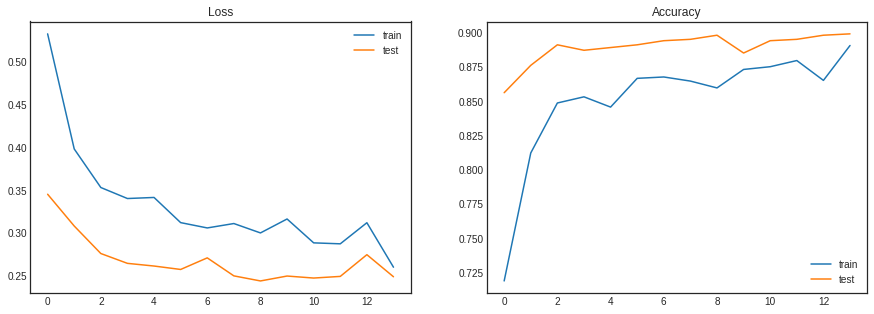

In [ ]:
# 히스토리 그래프
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.legend()
plt.show()

In [ ]:
# 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

path = '/content/test_image.png'
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
# x.shape #(150, 150, 3)
x=np.expand_dims(x, axis=0)
x.shape #(1, 150, 150, 3)
classes = model.predict(x, batch_size=10)
print(classes[0])
if classes[0]>0:
    print(path + " is a dog")
else:
    print(path + " is a cat")

[1.]
/content/test_image.png is a dog


# Fine-Tuning

In [ ]:
base_model.trainable = True
model.compile(optimizer=Adam(1e-5),  # Low learning rate
    loss='binary_crossentropy',
    metrics=['acc'])

In [ ]:
save_file_name = 'cat_and_dogs_model_with_pretrained_model2.h5'
checkpoint = ModelCheckpoint(save_file_name, monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='auto')
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history3 = model.fit(train, epochs=30, validation_data=test, verbose=2, callbacks=[checkpoint, earlystopping]) 

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.36685, saving model to cat_and_dogs_model_with_pretrained_model2.h5
63/63 - 44s - loss: 0.5729 - acc: 0.7000 - val_loss: 0.3669 - val_acc: 0.8320 - 44s/epoch - 695ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.36685 to 0.21161, saving model to cat_and_dogs_model_with_pretrained_model2.h5
63/63 - 25s - loss: 0.3345 - acc: 0.8570 - val_loss: 0.2116 - val_acc: 0.9100 - 25s/epoch - 390ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.21161 to 0.15948, saving model to cat_and_dogs_model_with_pretrained_model2.h5
63/63 - 23s - loss: 0.2326 - acc: 0.9115 - val_loss: 0.1595 - val_acc: 0.9320 - 23s/epoch - 366ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.15948 to 0.13936, saving model to cat_and_dogs_model_with_pretrained_model2.h5
63/63 - 23s - loss: 0.2121 - acc: 0.9225 - val_loss: 0.1394 - val_acc: 0.9450 - 23s/epoch - 372ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.13936 to 0.13818, saving model to cat_and_dogs

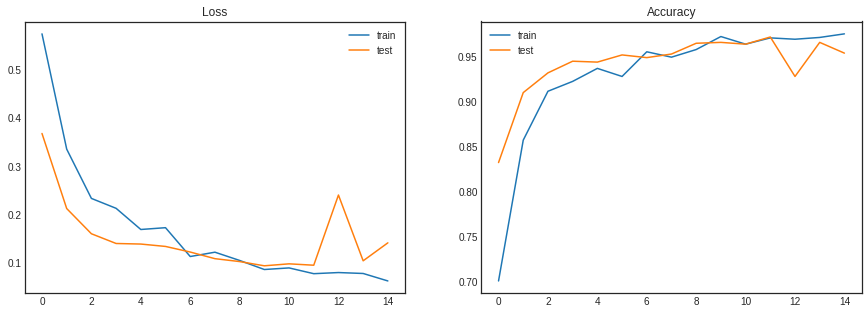

In [ ]:
# 히스토리 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history3.history['acc'], label='train')
plt.plot(history3.history['val_acc'], label='test')
plt.legend()
plt.show()

# 데이터 프레임으로 배열 만들기

In [ ]:
# 패쓰설정
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')
validation_cat_dir = os.path.join(train_dir, 'cats')
validation_dog_dir = os.path.join(train_dir, 'dogs')

# 파일이름 생성
train_cat_path = [os.path.join(train_cat_dir, i) for i in os.listdir(train_cat_dir)]
train_dog_path = [os.path.join(train_dog_dir, i) for i in os.listdir(train_dog_dir)]

In [ ]:
# 데이터프레임 만들기
import pandas as pd

# Dataframe
train_cat_df = pd.DataFrame({'PATH':train_cat_path,'targets':['cat']*len(train_cat_path)}) 
train_cat_df
train_dog_df = pd.DataFrame({'PATH':train_dog_path,'targets':['dog']*len(train_dog_path)}) 
train_dog_df
df = pd.concat([train_cat_df, train_dog_df])
from sklearn.utils import shuffle
df = shuffle(df)
df

,PATH,targets
408,/content/cats_and_dogs_filtered/train/cats/cat...,cat
523,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
271,/content/cats_and_dogs_filtered/train/cats/cat...,cat
787,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
708,/content/cats_and_dogs_filtered/train/cats/cat...,cat
...,...,...
889,/content/cats_and_dogs_filtered/train/cats/cat...,cat
390,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
22,/content/cats_and_dogs_filtered/train/cats/cat...,cat
775,/content/cats_and_dogs_filtered/train/dogs/dog...,dog


In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)
train_df

,PATH,targets
372,/content/cats_and_dogs_filtered/train/cats/cat...,cat
731,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
931,/content/cats_and_dogs_filtered/train/cats/cat...,cat
742,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
608,/content/cats_and_dogs_filtered/train/cats/cat...,cat
...,...,...
434,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
556,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
744,/content/cats_and_dogs_filtered/train/dogs/dog...,dog
824,/content/cats_and_dogs_filtered/train/dogs/dog...,dog


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()
train=datagen.flow_from_dataframe(dataframe=train_df, 
                                     x_col="PATH",
                                     y_col="targets",
                                     target_size=(150, 150),
                                     class_mode="binary")
train

Found 1600 validated image filenames belonging to 2 classes.


In [ ]:
train.class_indices

{'cat': 0, 'dog': 1}